In [1]:
import pandas as pd
data = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv', sep=',', engine='python')

In [2]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041160e+11,1.139230e+11,1.249130e+11,1.267300e+11,1.026210e+11,9.533720e+10,1.242090e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [3]:
data[data['Country Name'] == 'Thailand']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
231,Thailand,THA,GDP (current US$),NY.GDP.MKTP.CD,2.760747e+09,3.034044e+09,3.308913e+09,3.540403e+09,3.889130e+09,4.388938e+09,...,2.913830e+11,2.817100e+11,3.411050e+11,3.708190e+11,3.975580e+11,4.203330e+11,4.073390e+11,4.013990e+11,4.117550e+11,4.552210e+11


In [25]:
th = data[data['Country Name'] == 'Thailand'].drop(['Country Name','Country Code','Indicator Name','Indicator Code'], axis=1)
th

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
231,2.760747e+09,3.034044e+09,3.308913e+09,3.540403e+09,3.889130e+09,4.388938e+09,5.279231e+09,5.638461e+09,6.081009e+09,6.695337e+09,...,2.913830e+11,2.817100e+11,3.411050e+11,3.708190e+11,3.975580e+11,4.203330e+11,4.073390e+11,4.013990e+11,4.117550e+11,4.552210e+11


In [57]:
th_T = th.T
y = th_T.values.tolist()
th_T.head()

,231
1960,2.760747e+09
1961,3.034044e+09
1962,3.308913e+09
1963,3.540403e+09
1964,3.889130e+09


In [61]:
import numpy as np
x=np.arange(1960,1960+58).reshape(-1,1)
x.shape

(58, 1)

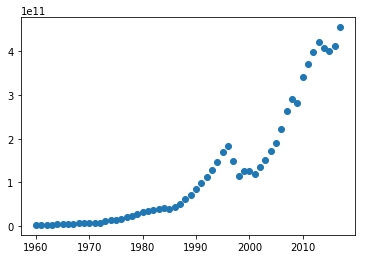

In [59]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [62]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([-1.4250218e+13]), array([[7.22804224e+09]]))

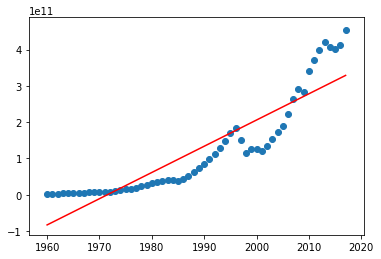

In [63]:
y_pre = lin_reg.predict(x)
plt.plot(x,y_pre,"r-")
plt.scatter(x,y)

In [65]:
y_pre = lin_reg.predict(2018)
y_pre

array([[3.35971268e+11]])

In [77]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X=poly_features.fit_transform(x)
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([7.92072481e+14]), array([[-8.03815308e+11,  2.03933455e+08]]))

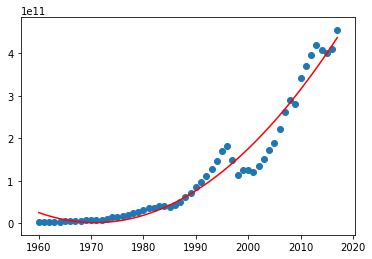

In [82]:
y_pre = lin_reg.predict(X)
plt.plot(x,y_pre,"r-")
plt.scatter(x,y)

In [84]:
X_test=poly_features.fit_transform(2018)
y_pre = lin_reg.predict(X_test)
y_pre

array([[4.56292006e+11]])